# load packages

In [1]:
import scanpy as sc
import numpy as np
import torch
import anndata as ad
from scGES import scGES_API
from scGES import metric
import warnings
warnings.filterwarnings("ignore")

import os
os.environ["CUDA_VISIBLE_DEVICES"]="0,1,2"

device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
os.chdir('/mnt/mechanical_drive/DATA/dszspur/scTAE')
os.environ['R_HOME'] = '/home/dszspur/.conda/envs/py38/lib/R'

/home/dszspur/.conda/envs/py39/lib/python3.9/site-packages/torch/cuda/__init__.py:56: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]


# load datasets

The PBMC dataset is available in [here](https://doi.org/10.6084/m9.figshare.12420968.v7).

In [2]:
adata = sc.read("./Immune_ALL_human.h5ad", cache=True)  # 5个batch
adata = adata[adata.obs['batch'] != 'Villani'].copy()
adata.obs['cell_type'] = adata.obs['final_annotation']
variables_to_drop = adata.obs.keys().tolist()
variables_to_drop.remove('cell_type')
variables_to_drop.remove('study')
variables_to_drop.remove('batch')
variables_to_drop.remove('species')
variables_to_drop.remove('tissue')
adata.obs.drop(variables_to_drop, inplace=True, axis=1)
adata.obs['celltype'] = adata.obs['cell_type']
adata.obs['study'] = adata.obs['batch']
adata.layers['norm_ori'] = adata.X.copy()
print(adata.obs['study'].unique())

['Oetjen_A', 'Oetjen_P', 'Oetjen_U', 'Freytag', '10X', 'Sun_sample1_CS', 'Sun_sample2_KC', 'Sun_sample3_TB', 'Sun_sample4_TC']
Categories (9, object): ['10X', 'Freytag', 'Oetjen_A', 'Oetjen_P', ..., 'Sun_sample1_CS', 'Sun_sample2_KC', 'Sun_sample3_TB', 'Sun_sample4_TC']


# scGESI

In [3]:
scges = scGES_API(adata.copy(), tech_key='study', query_name=None,celltype_key = 'cell_type', batch_size = 64,
                  train_params={'num_epochs': 5, 'lr': 0.001},device = device, 
                  mode_save_dir='methods_weight/pbmc')

scges.train_atlas(model_type = 'HVG',train_params = {'num_epochs': 10, 'lr': 0.001,'weight':[1,5,1]})  
scges.train_atlas(model_type = 'LVG',train_params = {'num_epochs': 10, 'lr': 0.001, 'weight':[1,1], 'each_epochs': [1,1]}) 

... data preprocess ...


100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.42s/it]


Model weights have been saved.
Loaded pre-trained weights for pretrain_model from methods_results/scGES/pbmc9/pretrain_model.pth.
...  ATLAS HVG train ...
label dict 32484
all labels are known with atlas
cells for train: 32484


 10%|████████▍                                                                           | 1/10 [00:34<05:11, 34.56s/it]

atlas_model_HVG - Epoch [1/10], Tatol Loss: 713.4860


 20%|████████████████▊                                                                   | 2/10 [01:07<04:29, 33.67s/it]

atlas_model_HVG - Epoch [2/10], Tatol Loss: 693.5272


 30%|█████████████████████████▏                                                          | 3/10 [01:37<03:42, 31.81s/it]

atlas_model_HVG - Epoch [3/10], Tatol Loss: 682.3975


 40%|█████████████████████████████████▌                                                  | 4/10 [02:09<03:11, 31.92s/it]

atlas_model_HVG - Epoch [4/10], Tatol Loss: 674.1316


 50%|██████████████████████████████████████████                                          | 5/10 [02:42<02:41, 32.32s/it]

atlas_model_HVG - Epoch [5/10], Tatol Loss: 667.3091


 60%|██████████████████████████████████████████████████▍                                 | 6/10 [03:07<01:59, 29.85s/it]

atlas_model_HVG - Epoch [6/10], Tatol Loss: 661.8732


 70%|██████████████████████████████████████████████████████████▊                         | 7/10 [03:40<01:32, 30.88s/it]

atlas_model_HVG - Epoch [7/10], Tatol Loss: 656.9461


 80%|███████████████████████████████████████████████████████████████████▏                | 8/10 [04:13<01:02, 31.44s/it]

atlas_model_HVG - Epoch [8/10], Tatol Loss: 653.3272


 90%|███████████████████████████████████████████████████████████████████████████▌        | 9/10 [04:44<00:31, 31.50s/it]

atlas_model_HVG - Epoch [9/10], Tatol Loss: 650.0020


100%|███████████████████████████████████████████████████████████████████████████████████| 10/10 [05:15<00:00, 31.50s/it]

atlas_model_HVG - Epoch [10/10], Tatol Loss: 647.1166
Model weights have been saved.
Loaded pre-trained weights for atlas_model_HVG from methods_results/scGES/pbmc9/atlas_model_HVG.pth.


...  atlas LVG train ...


 10%|████████▍                                                                           | 1/10 [00:20<03:03, 20.36s/it]

atlas_model_LVG - Epoch [1/10], Reconstruction Loss: 0.3310, Classification Loss: 2.1379


 20%|████████████████▊                                                                   | 2/10 [00:46<03:12, 24.02s/it]

atlas_model_LVG - Epoch [2/10], Reconstruction Loss: 0.3341, Classification Loss: 2.1426


 30%|█████████████████████████▏                                                          | 3/10 [01:13<02:57, 25.29s/it]

atlas_model_LVG - Epoch [3/10], Reconstruction Loss: 0.3466, Classification Loss: 2.1304


 40%|█████████████████████████████████▌                                                  | 4/10 [01:39<02:33, 25.59s/it]

atlas_model_LVG - Epoch [4/10], Reconstruction Loss: 0.3572, Classification Loss: 2.1088


 50%|██████████████████████████████████████████                                          | 5/10 [02:04<02:06, 25.33s/it]

atlas_model_LVG - Epoch [5/10], Reconstruction Loss: 0.3157, Classification Loss: 2.0660


 60%|██████████████████████████████████████████████████▍                                 | 6/10 [02:36<01:49, 27.39s/it]

atlas_model_LVG - Epoch [6/10], Reconstruction Loss: 0.3144, Classification Loss: 2.0716


 70%|██████████████████████████████████████████████████████████▊                         | 7/10 [03:00<01:19, 26.34s/it]

atlas_model_LVG - Epoch [7/10], Reconstruction Loss: 0.3046, Classification Loss: 2.0758


 80%|███████████████████████████████████████████████████████████████████▏                | 8/10 [03:27<00:53, 26.60s/it]

atlas_model_LVG - Epoch [8/10], Reconstruction Loss: 0.3135, Classification Loss: 2.0558


 90%|███████████████████████████████████████████████████████████████████████████▌        | 9/10 [03:53<00:26, 26.35s/it]

atlas_model_LVG - Epoch [9/10], Reconstruction Loss: 0.3534, Classification Loss: 2.0559


100%|███████████████████████████████████████████████████████████████████████████████████| 10/10 [04:22<00:00, 26.21s/it]

atlas_model_LVG - Epoch [10/10], Reconstruction Loss: 0.3557, Classification Loss: 2.0550
Model weights have been saved.
Loaded pre-trained weights for atlas_model_LVG from methods_results/scGES/pbmc9/atlas_model_LVG.pth.


# Integration Results of scGESI

In [4]:
import matplotlib.pyplot as plt
from anndata import AnnData
from copy import deepcopy

adata_results = scges.atlas.copy()

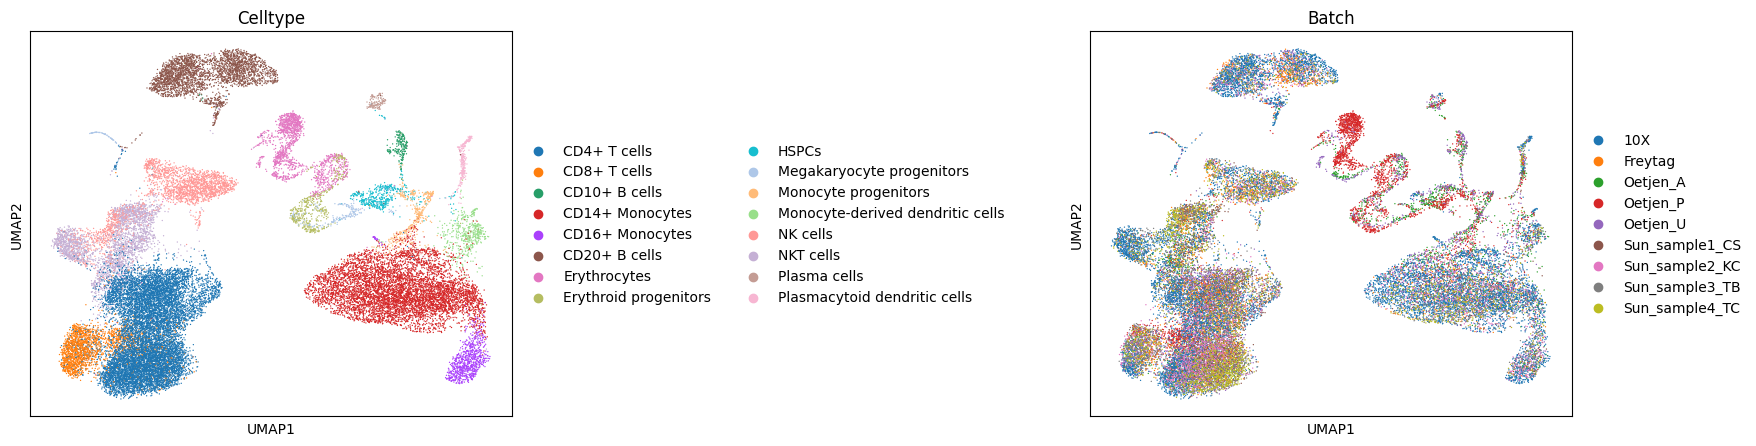

In [5]:
temporary_HVG = AnnData(deepcopy(adata_results.obsm['atlas HVG denoised']))
temporary_HVG.obs = adata_results.obs

sc.pp.normalize_total(temporary_HVG)
sc.pp.log1p(temporary_HVG, copy=False)
sc.pp.scale(temporary_HVG)
sc.tl.pca(temporary_HVG, n_comps=30, svd_solver='arpack')
sc.pp.neighbors(temporary_HVG, n_neighbors = 15)
sc.tl.umap(temporary_HVG)

plt.rcParams["figure.figsize"] = (5, 5)
sc.pl.umap(temporary_HVG, color = ["celltype",  "study"],  title = ['Celltype',  'Batch'], wspace=1,  ncols=2)

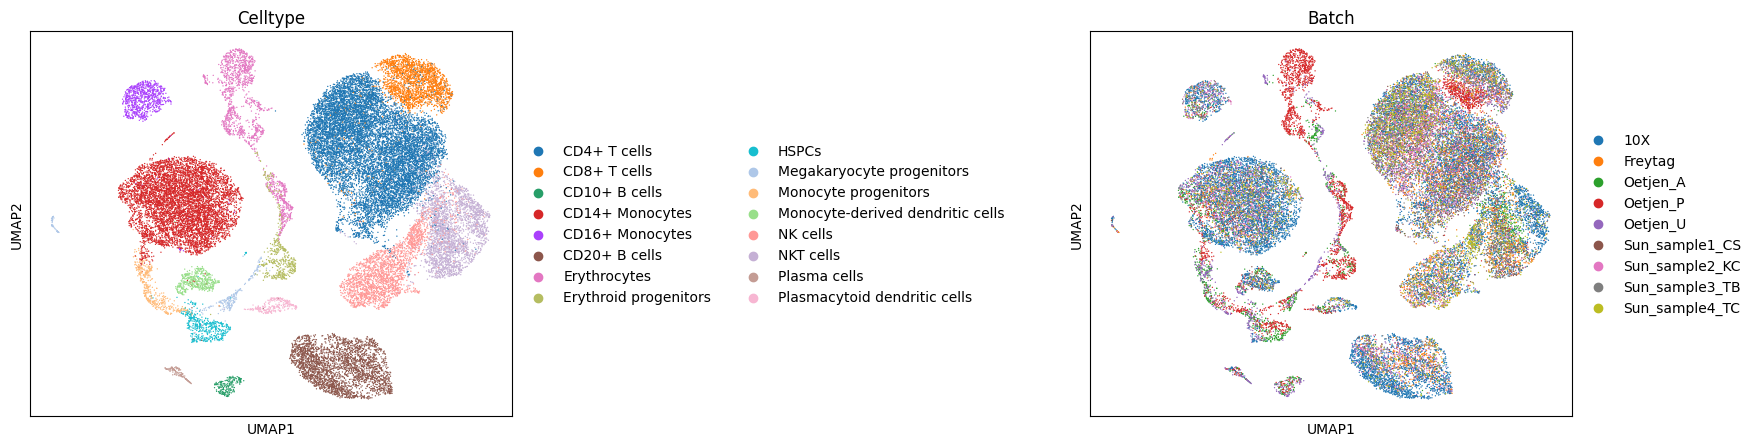

In [6]:
temporary_LVG = AnnData(deepcopy(adata_results.obsm['atlas LVG denoised']))
temporary_LVG.obs = adata_results.obs

sc.pp.normalize_total(temporary_LVG)
sc.pp.log1p(temporary_LVG, copy=False)
sc.pp.scale(temporary_LVG)
sc.tl.pca(temporary_LVG, n_comps=30, svd_solver='arpack')
sc.pp.neighbors(temporary_LVG, n_neighbors = 15)
sc.tl.umap(temporary_LVG)

plt.rcParams["figure.figsize"] = (5, 5)
sc.pl.umap(temporary_LVG, color = ["celltype",  "study"], title = ['Celltype',  'Batch'], wspace=1, ncols=2)

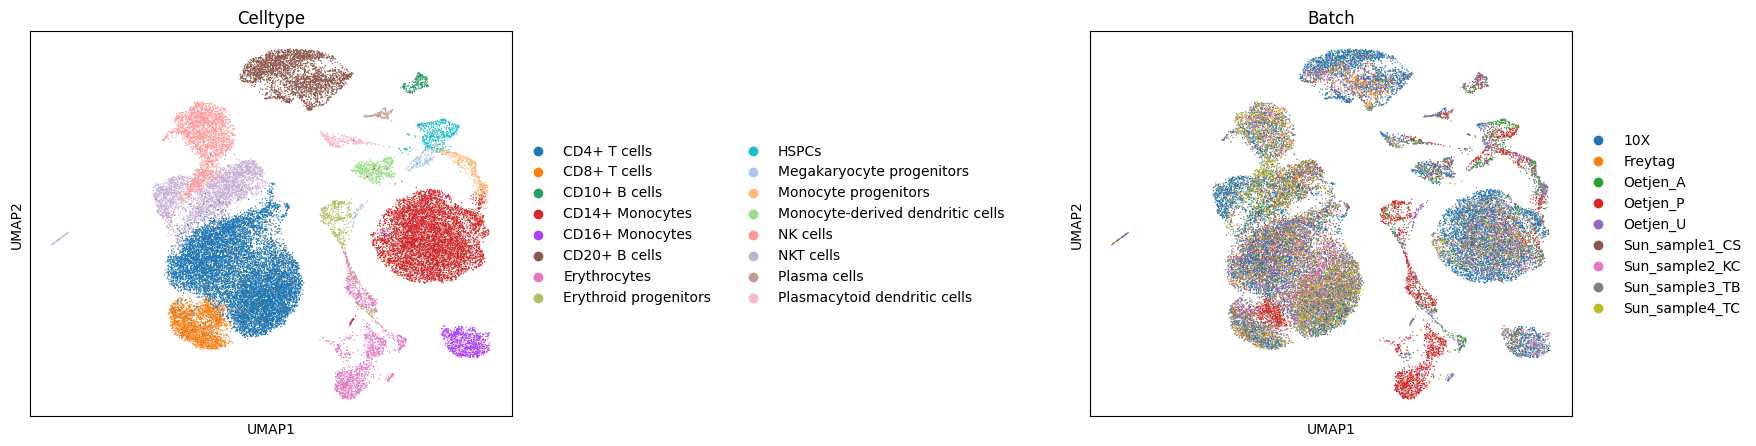

In [7]:
temporary_ALL = AnnData(deepcopy(np.concatenate((adata_results.obsm["atlas HVG denoised"], adata_results.obsm["atlas LVG denoised"]), axis=1)))
temporary_ALL.obs = adata_results.obs

sc.pp.normalize_total(temporary_ALL)
sc.pp.log1p(temporary_ALL, copy=False)
sc.pp.scale(temporary_ALL)
sc.tl.pca(temporary_ALL, n_comps=30, svd_solver='arpack')
sc.pp.neighbors(temporary_ALL, n_neighbors = 15)
sc.tl.umap(temporary_ALL)

plt.rcParams["figure.figsize"] = (5, 5)
sc.pl.umap(temporary_ALL, color = ["celltype",  "study"], title = ['Celltype',  'Batch'], wspace=1, ncols=2)

# scGESM

In [8]:
query_tech = '10X'
scges = scGES_API(adata.copy(), tech_key='study', query_name= query_tech,celltype_key = 'cell_type', batch_size = 64,
                  train_params={'num_epochs': 5, 'lr': 0.001},device = device, 
                  mode_save_dir='methods_results/scGESM/pbmc')

scges.train_atlas(model_type = 'HVG',train_params = {'num_epochs': 10, 'lr': 0.001,'weight':[1,5,1]})  
scges.train_map(model_type = 'HVG',train_params = {'num_epochs': 5, 'lr': 0.001, 'weight':[1,1]}) 

scges.train_atlas(model_type = 'LVG',train_params = {'num_epochs': 10, 'lr': 0.001, 'weight':[1,1], 'each_epochs': [1,1]})  
scges.train_map(model_type = 'LVG',train_params = {'num_epochs': 5, 'lr': 0.001,'weight':[1,1], 'each_epochs': [1,1]}) 

... data preprocess ...


100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:15<00:00,  3.19s/it]


Model weights have been saved.
Loaded pre-trained weights for pretrain_model from methods_results/scGESM/pbmc/pretrain_model.pth.
Loaded pre-trained weights for pretrain_model from methods_results/scGESM/pbmc/pretrain_model.pth.
...  ATLAS HVG train ...
label dict 21757
all labels are known with atlas
cells for train: 21757


 10%|████████▍                                                                           | 1/10 [00:15<02:18, 15.34s/it]

atlas_model_HVG - Epoch [1/10], Tatol Loss: 705.9341


 20%|████████████████▊                                                                   | 2/10 [00:26<01:42, 12.80s/it]

atlas_model_HVG - Epoch [2/10], Tatol Loss: 679.3283


 30%|█████████████████████████▏                                                          | 3/10 [00:39<01:32, 13.18s/it]

atlas_model_HVG - Epoch [3/10], Tatol Loss: 667.7172


 40%|█████████████████████████████████▌                                                  | 4/10 [00:51<01:14, 12.36s/it]

atlas_model_HVG - Epoch [4/10], Tatol Loss: 659.4239


 50%|██████████████████████████████████████████                                          | 5/10 [01:02<01:00, 12.04s/it]

atlas_model_HVG - Epoch [5/10], Tatol Loss: 653.3481


 60%|██████████████████████████████████████████████████▍                                 | 6/10 [01:17<00:52, 13.12s/it]

atlas_model_HVG - Epoch [6/10], Tatol Loss: 647.6014


 70%|██████████████████████████████████████████████████████████▊                         | 7/10 [01:33<00:42, 14.10s/it]

atlas_model_HVG - Epoch [7/10], Tatol Loss: 643.6014


 80%|███████████████████████████████████████████████████████████████████▏                | 8/10 [01:46<00:27, 13.55s/it]

atlas_model_HVG - Epoch [8/10], Tatol Loss: 639.8475


 90%|███████████████████████████████████████████████████████████████████████████▌        | 9/10 [02:03<00:14, 14.80s/it]

atlas_model_HVG - Epoch [9/10], Tatol Loss: 636.5763


100%|███████████████████████████████████████████████████████████████████████████████████| 10/10 [02:19<00:00, 13.91s/it]

atlas_model_HVG - Epoch [10/10], Tatol Loss: 634.2085
Model weights have been saved.
Loaded pre-trained weights for atlas_model_HVG from methods_results/scGESM/pbmc/atlas_model_HVG.pth.


...  MAP HVG train ...
mnns and knns of mapping
mnn dict 10727
cells for train: 10727
Loaded pre-trained weights for atlas_model_HVG from methods_results/scGESM/pbmc/atlas_model_HVG.pth.
Fixed weight completion!


 20%|█████████████████                                                                    | 1/5 [00:09<00:36,  9.02s/it]

map_model_HVG - Epoch [1/5], Tatol Loss: 1255.8857


 40%|██████████████████████████████████                                                   | 2/5 [00:17<00:25,  8.47s/it]

map_model_HVG - Epoch [2/5], Tatol Loss: 1196.5552


 60%|███████████████████████████████████████████████████                                  | 3/5 [00:25<00:16,  8.27s/it]

map_model_HVG - Epoch [3/5], Tatol Loss: 1155.2440


 80%|████████████████████████████████████████████████████████████████████                 | 4/5 [00:33<00:08,  8.21s/it]

map_model_HVG - Epoch [4/5], Tatol Loss: 1122.2043


100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:42<00:00,  8.46s/it]

map_model_HVG - Epoch [5/5], Tatol Loss: 1093.3704
Model weights have been saved.
Loaded pre-trained weights for map_model_HVG from methods_results/scGESM/pbmc/map_model_HVG.pth.
Loaded pre-trained weights for atlas_model_HVG from methods_results/scGESM/pbmc/atlas_model_HVG.pth.


...  atlas LVG train ...


 10%|████████▍                                                                           | 1/10 [00:13<02:01, 13.54s/it]

atlas_model_LVG - Epoch [1/10], Reconstruction Loss: 0.2785, Classification Loss: 2.2468


 20%|████████████████▊                                                                   | 2/10 [00:27<01:49, 13.72s/it]

atlas_model_LVG - Epoch [2/10], Reconstruction Loss: 0.2844, Classification Loss: 2.1628


 30%|█████████████████████████▏                                                          | 3/10 [00:40<01:35, 13.63s/it]

atlas_model_LVG - Epoch [3/10], Reconstruction Loss: 0.2872, Classification Loss: 2.1205


 40%|█████████████████████████████████▌                                                  | 4/10 [00:54<01:21, 13.52s/it]

atlas_model_LVG - Epoch [4/10], Reconstruction Loss: 0.2985, Classification Loss: 2.1321


 50%|██████████████████████████████████████████                                          | 5/10 [01:08<01:08, 13.68s/it]

atlas_model_LVG - Epoch [5/10], Reconstruction Loss: 0.2847, Classification Loss: 2.0573


 60%|██████████████████████████████████████████████████▍                                 | 6/10 [01:21<00:54, 13.55s/it]

atlas_model_LVG - Epoch [6/10], Reconstruction Loss: 0.3378, Classification Loss: 2.0703


 70%|██████████████████████████████████████████████████████████▊                         | 7/10 [01:34<00:40, 13.42s/it]

atlas_model_LVG - Epoch [7/10], Reconstruction Loss: 0.3396, Classification Loss: 2.0653


 80%|███████████████████████████████████████████████████████████████████▏                | 8/10 [01:47<00:26, 13.35s/it]

atlas_model_LVG - Epoch [8/10], Reconstruction Loss: 0.2829, Classification Loss: 2.0690


 90%|███████████████████████████████████████████████████████████████████████████▌        | 9/10 [02:00<00:13, 13.24s/it]

atlas_model_LVG - Epoch [9/10], Reconstruction Loss: 0.2795, Classification Loss: 2.0548


100%|███████████████████████████████████████████████████████████████████████████████████| 10/10 [02:13<00:00, 13.39s/it]

atlas_model_LVG - Epoch [10/10], Reconstruction Loss: 0.2958, Classification Loss: 2.0544
Model weights have been saved.
Loaded pre-trained weights for atlas_model_LVG from methods_results/scGESM/pbmc/atlas_model_LVG.pth.


... map LVG train ...
Loaded pre-trained weights for atlas_model_LVG from methods_results/scGESM/pbmc/atlas_model_LVG.pth.


 20%|█████████████████                                                                    | 1/5 [00:20<01:22, 20.56s/it]

map_model_LVG - Epoch [1/5], Reconstruction Loss: 0.3948, Classification Loss: 2.1391


 40%|██████████████████████████████████                                                   | 2/5 [00:41<01:02, 20.87s/it]

map_model_LVG - Epoch [2/5], Reconstruction Loss: 0.3005, Classification Loss: 2.1230


 60%|███████████████████████████████████████████████████                                  | 3/5 [01:05<00:44, 22.38s/it]

map_model_LVG - Epoch [3/5], Reconstruction Loss: 0.3492, Classification Loss: 2.1027


 80%|████████████████████████████████████████████████████████████████████                 | 4/5 [01:26<00:21, 21.55s/it]

map_model_LVG - Epoch [4/5], Reconstruction Loss: 0.3194, Classification Loss: 2.1632


100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:45<00:00, 21.18s/it]

map_model_LVG - Epoch [5/5], Reconstruction Loss: 0.3173, Classification Loss: 2.1559
Model weights have been saved.
Loaded pre-trained weights for map_model_LVG from methods_results/scGESM/pbmc/map_model_LVG.pth.
Loaded pre-trained weights for atlas_model_LVG from methods_results/scGESM/pbmc/atlas_model_LVG.pth.


# Mapping Results of scGESM

In [9]:
adata_map = scges.adatamap.copy()

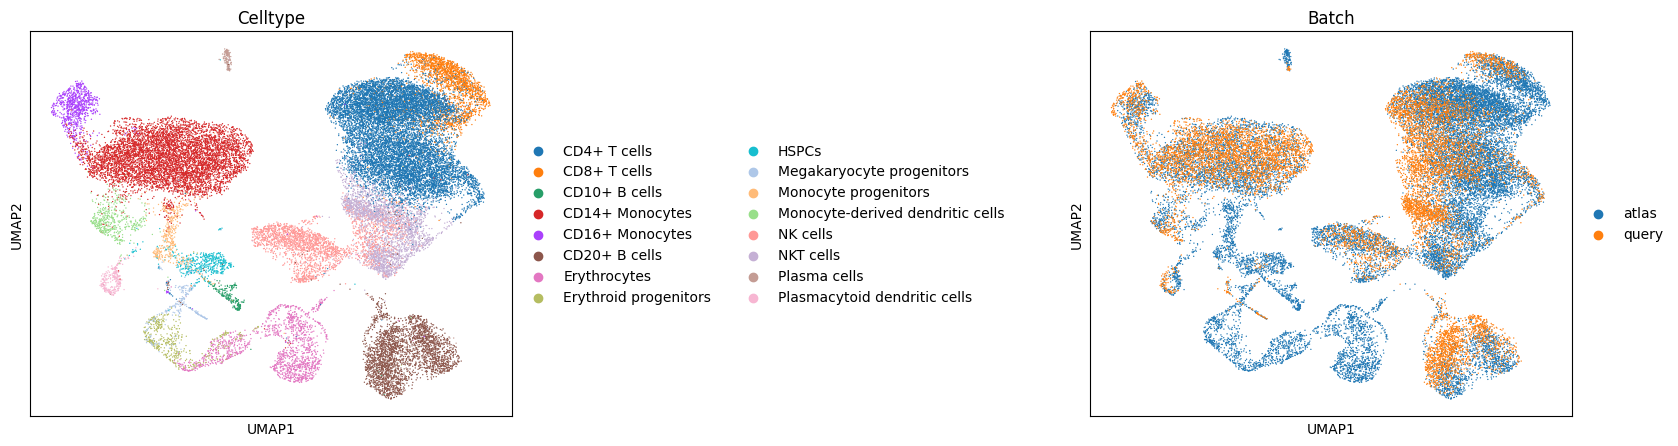

In [10]:
temporary_HVG = AnnData(deepcopy(adata_map.obsm['map HVG denoised']))
temporary_HVG.obs = adata_map.obs

sc.pp.normalize_total(temporary_HVG)
sc.pp.log1p(temporary_HVG, copy=False)
sc.pp.scale(temporary_HVG)
sc.tl.pca(temporary_HVG, n_comps=30, svd_solver='arpack')
sc.pp.neighbors(temporary_HVG, n_neighbors = 15)
sc.tl.umap(temporary_HVG)

plt.rcParams["figure.figsize"] = (5, 5)
sc.pl.umap(temporary_HVG, color = ["celltype",  "batch"], title = ['Celltype',  'Batch'], wspace=1,  ncols=2)

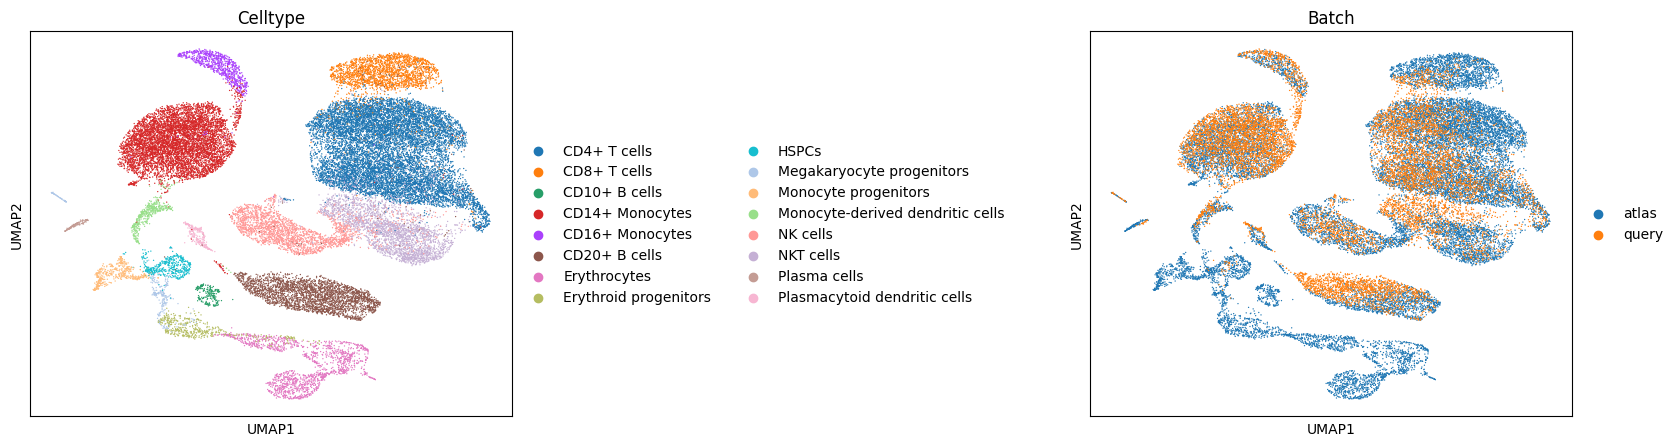

In [11]:
temporary_LVG = AnnData(deepcopy(adata_map.obsm['map LVG denoised']))
temporary_LVG.obs = adata_map.obs

sc.pp.normalize_total(temporary_LVG)
sc.pp.log1p(temporary_LVG, copy=False)
sc.pp.scale(temporary_LVG)
sc.tl.pca(temporary_LVG, n_comps=30, svd_solver='arpack')
sc.pp.neighbors(temporary_LVG, n_neighbors = 15)
sc.tl.umap(temporary_LVG)

plt.rcParams["figure.figsize"] = (5, 5)
sc.pl.umap(temporary_LVG, color = ["celltype",  "batch"], title = ['Celltype',  'Batch'], wspace=1, ncols=2)

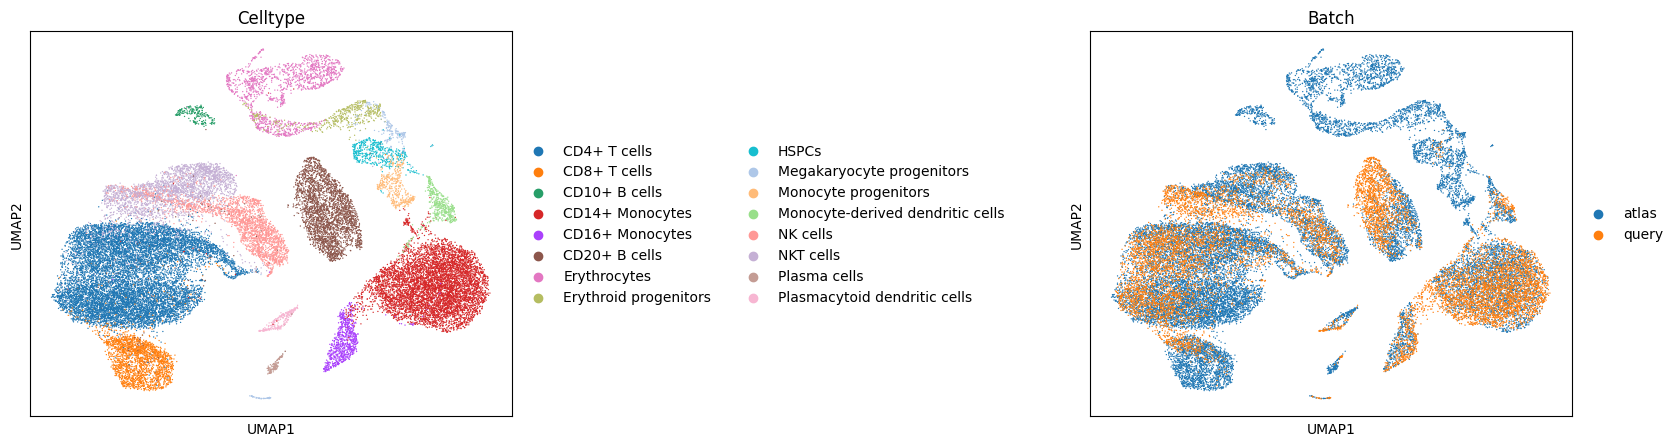

In [12]:
temporary_ALL = AnnData(deepcopy(np.concatenate((adata_map.obsm["map HVG denoised"], adata_map.obsm["map LVG denoised"]), axis=1)))
temporary_ALL.obs = adata_map.obs

sc.pp.normalize_total(temporary_ALL)
sc.pp.log1p(temporary_ALL, copy=False)
sc.pp.scale(temporary_ALL)
sc.tl.pca(temporary_ALL, n_comps=30, svd_solver='arpack')
sc.pp.neighbors(temporary_ALL, n_neighbors = 15)
sc.tl.umap(temporary_ALL)

plt.rcParams["figure.figsize"] = (5, 5)
sc.pl.umap(temporary_ALL, color = ["celltype",  "batch"], title = ['Celltype',  'Batch'], wspace=1, ncols=2)

# Label Transfer

In [13]:
import numpy as np
import pandas as pd
from collections import Counter
import scanpy as sc
from collections import Counter
from sklearn.neighbors import NearestNeighbors

In [14]:
temporary_HVG.obsm['HVG denoised pca'] = temporary_HVG.obsm['X_pca']
temporary_HVG.obsm['LVG denoised pca'] = temporary_LVG.obsm['X_pca']
temporary_HVG.obsm['ALL denoised pca'] = temporary_ALL.obsm['X_pca']

In [19]:
adata_ref = temporary_HVG[temporary_HVG.obs['batch'] != 'query']
adata_query = temporary_HVG[temporary_HVG.obs['batch'] == 'query']

In [20]:
# First
adata_query.obs['predictions'] = metric.Label_transfer(adata_query, adata_ref, n_neighbors=20, emb_key = 'HVG denoised pca', ref_label_key = 'celltype')
index = np.where(adata_query.obs['predictions'] == 0)[0].tolist() 

# Second
if len(index) >1:
    label = metric.Label_transfer(adata_query, n_neighbors=30,  index = index, emb_key = 'HVG denoised pca', ref_label_key = 'celltype')
adata_query.obs.loc[adata_query.obs.index[index], 'predictions'] = label

In [21]:
R = metric.Metric_label(adata_query.obs['celltype'], adata_query.obs['predictions'])
print(R['MedF1'])
print(R['Acc'])

0.8953738569123184
0.9387526801528853
